<h2 style='color:orange'><u><i><b>MULTIPLE LINEAR REGRESSION MODEL ( REPUTATION SCORE %AGE PREDICTION )</b></i></u></h2>
<p>This model is tested on the following google scholors scrapped data of 500 top scholors of computer science present on the google scholors site.
<br>In the below dataset there is one output reputation percentage or reputation score out of 500. By training model on these inputs and that one output either score %age or simple score i will predict the future repu score of the scholors.</p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("Data-Files/CS_Scholors_Reputation.csv")
dataset

,Author names,All Citations,Citations since 2020,All h-index,h-index since 2020,All i10-index,i10-index since 2020,Reputation Score since 2020,Reputation Percentage,Profile Links,Research Field
0,Jiawei Han,262906,71320,210,113,1085,674,271.42,54.284,https://scholar.google.com/citations?hl=en&use...,Computer Science
1,Skander Gasmi,215766,202935,55,47,78,64,171.44,34.288,https://scholar.google.com/citations?hl=en&use...,Computer Science
2,Philip S. Yu,215546,98329,203,131,1593,980,355.57,71.114,https://scholar.google.com/citations?hl=en&use...,Computer Science
3,David S. Johnson,213524,36872,116,60,391,184,124.41,24.882,https://scholar.google.com/citations?hl=en&use...,Computer Science
4,Jure Leskovec,188462,125259,156,130,380,346,240.38,48.076,https://scholar.google.com/citations?hl=en&use...,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...
495,Xifeng Yan,30164,10071,76,44,183,126,77.31,15.462,https://scholar.google.com/citations?hl=en&use...,Computer Science
496,Charles A. Taylor,30164,12789,81,54,310,256,112.13,22.426,https://scholar.google.com/citations?hl=en&use...,Computer Science
497,Paul Debevec,30140,9168,65,43,151,96,69.42,13.884,https://scholar.google.com/citations?hl=en&use...,Computer Science
498,Haim J. Wolfson,30136,6100,83,31,173,75,53.93,10.786,https://scholar.google.com/citations?hl=en&use...,Computer Science


<div style="background-color:#222; color:white; padding:10px; border-radius:10px;">
    <p style='text-decoration:underline; font-weight:bold; font-style:italic;'>Picking 3 features from the data.</p>
    <ul>
    <li>Citations since 2020</li>
    <li>h-index since 2020</li>
    <li>i10-index since 2020</li>
    <li><b>Output:</b> Reputaion Score %age out of 500</li>    
    </ul>
</div>

In [3]:
citations = dataset["Citations since 2020"].tolist()
h_index = dataset["h-index since 2020"].tolist()
i10_index = dataset["i10-index since 2020"].tolist()
y_repu_score = dataset["Reputation Percentage"].tolist()
# Rounding reputations score %age
y_repu_score = [round(score,2) for score in y_repu_score]
model_data = pd.DataFrame({
 "Citations (x1)":citations,
  "H-index (x2)": h_index,
  "i10-index (x3)":i10_index,
  "Reputations Score %age (y)": y_repu_score  
})
model_data

,Citations (x1),H-index (x2),i10-index (x3),Reputations Score %age (y)
0,71320,113,674,54.28
1,202935,47,64,34.29
2,98329,131,980,71.11
3,36872,60,184,24.88
4,125259,130,346,48.08
...,...,...,...,...
495,10071,44,126,15.46
496,12789,54,256,22.43
497,9168,43,96,13.88
498,6100,31,75,10.79


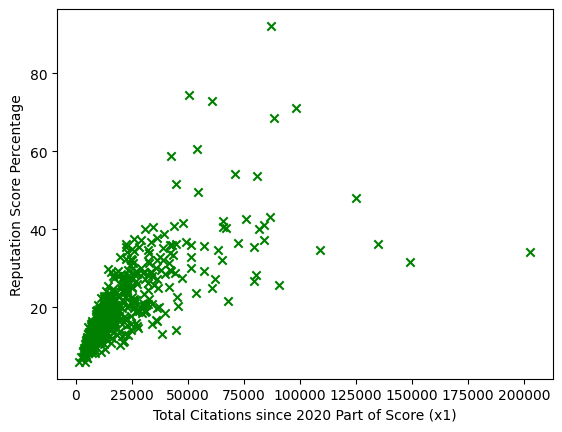

In [4]:
import matplotlib.pyplot as plt
plt.scatter(citations,y_repu_score,marker='x',c='g')
plt.xlabel("Total Citations since 2020 Part of Score (x1)")
plt.ylabel("Reputation Score Percentage")
plt.show()

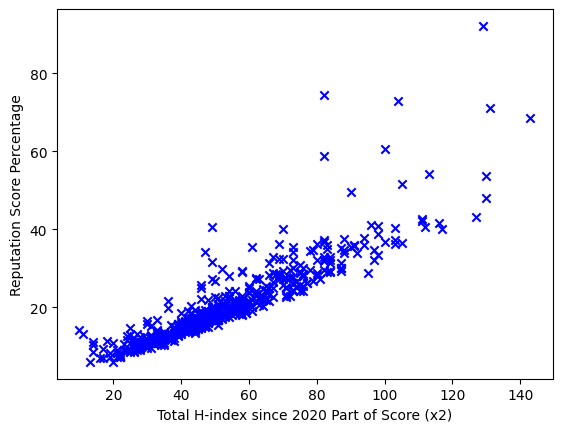

In [5]:
plt.scatter(h_index,y_repu_score,marker='x',c='b')
plt.xlabel("Total H-index since 2020 Part of Score (x2)")
plt.ylabel("Reputation Score Percentage")
plt.show()

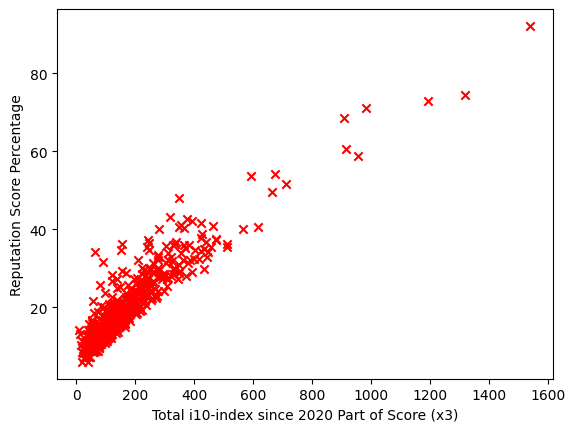

In [6]:
plt.scatter(i10_index,y_repu_score,marker='x',c='r')
plt.xlabel("Total i10-index since 2020 Part of Score (x3)")
plt.ylabel("Reputation Score Percentage")
plt.show()

In [7]:
def scaled_feature(feature):
    max_value = max(feature)
    feature = [x/max_value for x in feature]
    return feature

In [8]:
print(max(citations))
citations = scaled_feature(citations)
print(citations[0:10])

202935
[0.35144258013649693, 1.0, 0.48453445684578805, 0.18169364574863872, 0.6172370463448887, 0.11078916894572154, 0.42810752211299186, 0.13450612265010964, 0.7360041392564122, 0.43633675807524575]


In [9]:
print(max(h_index))
h_index = scaled_feature(h_index)
print(h_index[0:10])

143
[0.7902097902097902, 0.32867132867132864, 0.916083916083916, 0.4195804195804196, 0.9090909090909091, 0.2937062937062937, 0.8881118881118881, 0.5104895104895105, 0.34265734265734266, 1.0]


In [10]:
print(max(i10_index))
i10_index = scaled_feature(i10_index)
print(i10_index[0:10])

1539
[0.437946718648473, 0.04158544509421702, 0.6367771280051981, 0.11955815464587394, 0.22482131254061077, 0.057179987004548405, 0.20662768031189083, 0.14230019493177387, 0.057829759584145546, 0.589993502274204]


In [11]:
# Before updating the model dataframe whihc shows the actual data
model_data

,Citations (x1),H-index (x2),i10-index (x3),Reputations Score %age (y)
0,71320,113,674,54.28
1,202935,47,64,34.29
2,98329,131,980,71.11
3,36872,60,184,24.88
4,125259,130,346,48.08
...,...,...,...,...
495,10071,44,126,15.46
496,12789,54,256,22.43
497,9168,43,96,13.88
498,6100,31,75,10.79


In [12]:
# updated data frame that shows the featured scale data between 0 and 1
model_data = pd.DataFrame({
 "Citations (x1)":citations,
  "H-index (x2)": h_index,
  "i10-index (x3)":i10_index,
  "Reputations Score %age (y)": y_repu_score  
})
model_data

,Citations (x1),H-index (x2),i10-index (x3),Reputations Score %age (y)
0,0.351443,0.790210,0.437947,54.28
1,1.000000,0.328671,0.041585,34.29
2,0.484534,0.916084,0.636777,71.11
3,0.181694,0.419580,0.119558,24.88
4,0.617237,0.909091,0.224821,48.08
...,...,...,...,...
495,0.049627,0.307692,0.081871,15.46
496,0.063020,0.377622,0.166342,22.43
497,0.045177,0.300699,0.062378,13.88
498,0.030059,0.216783,0.048733,10.79


In [15]:
x_vector = np.column_stack((np.ones(500),citations,h_index,i10_index))
x_vector

array([[1.        , 0.35144258, 0.79020979, 0.43794672],
       [1.        , 1.        , 0.32867133, 0.04158545],
       [1.        , 0.48453446, 0.91608392, 0.63677713],
       ...,
       [1.        , 0.04517703, 0.3006993 , 0.06237817],
       [1.        , 0.03005889, 0.21678322, 0.04873294],
       [1.        , 0.08775716, 0.36363636, 0.06302794]])

In [32]:
import random
w = np.array([random.random(),random.random(),random.random(),random.random()])
w = w.reshape(4,1)

In [33]:
w

array([[0.70289587],
       [0.13229854],
       [0.60685942],
       [0.70373237]])

In [34]:
def hypothesis(x,w):
    return np.dot(x,w)

In [36]:
initial_prediction = hypothesis(x_vector,w)
initial_prediction[0:10]

array([[1.53713475],
       [1.06391672],
       [1.77105391],
       [1.06569695],
       [1.49445985],
       [0.93603096],
       [1.44390353],
       [1.13062746],
       [1.04890965],
       [1.78267954]])